In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import numpy as np
import pytz
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
plt.style.use('_mpl-gallery')

In [5]:
# Pilot Group

g1Participants = [15,17,19,20] 
startCoordination = datetime.datetime(2023,8,24,0,0,0,0,tzinfo=pytz.timezone('UTC'))

# Define the time range for nighttime shading - 7pm to 5am
nighttime_start = 19
nighttime_end = 5

bookings = pd.read_json("../../chatbot_data/bookings/bookings18-9-23.json")

bookings = pd.DataFrame(bookings.fields.values.tolist())

bookings['start'] = pd.to_datetime(bookings['start'],infer_datetime_format=True)
bookings['created_at'] = pd.to_datetime(bookings['created_at'],infer_datetime_format=True)
bookings['modified_at'] = pd.to_datetime(bookings['modified_at'],infer_datetime_format=True)

g1Bookings = bookings.loc[bookings['user'].isin(g1Participants)] 
g1Bookings = g1Bookings.loc[g1Bookings['start']>= startCoordination ] 
g1Bookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
6,2023-08-24 19:00:00+00:00,1800,dishwasher,None,yes,0.380220,22,electricity_consumption,20,2023-08-24 18:19:29.716000+00:00,2023-08-24 18:19:29.716000+00:00
8,2023-08-26 16:00:00+00:00,3600,hob,None,yes,0.649802,20,electricity_consumption,19,2023-08-25 20:26:23.504000+00:00,2023-08-25 20:26:23.504000+00:00
9,2023-08-26 17:00:00+00:00,3600,computer,None,yes,0.190037,14,electricity_consumption,15,2023-08-26 10:20:51.591000+00:00,2023-08-26 10:20:51.591000+00:00
10,2023-08-26 17:00:00+00:00,3600,computer,None,yes,0.190037,14,electricity_consumption,15,2023-08-26 10:22:25.105000+00:00,2023-08-26 10:22:25.105000+00:00
12,2023-08-27 17:00:00+00:00,3600,hob,None,yes,0.649802,20,electricity_consumption,19,2023-08-26 22:12:42.808000+00:00,2023-08-26 22:12:42.808000+00:00
13,2023-08-28 12:00:00+00:00,3600,hob,None,yes,0.649802,20,electricity_consumption,19,2023-08-26 22:15:33.149000+00:00,2023-08-26 22:15:33.149000+00:00
14,2023-08-27 06:00:00+00:00,1800,dishwasher,None,yes,0.380220,22,electricity_consumption,20,2023-08-26 23:12:21.863000+00:00,2023-08-26 23:12:21.864000+00:00
15,2023-08-27 15:00:00+00:00,7200,dishwasher,None,yes,2.293112,16,electricity_consumption,17,2023-08-27 14:30:19.752000+00:00,2023-08-27 14:30:19.752000+00:00
17,2023-08-28 14:00:00+00:00,14400,washing_and_drying,None,yes,3.334012,20,electricity_consumption,19,2023-08-28 11:11:18.035000+00:00,2023-08-28 11:11:18.035000+00:00
18,2023-08-29 17:00:00+00:00,3600,hob,None,yes,0.649802,20,electricity_consumption,19,2023-08-28 19:42:43.760000+00:00,2023-08-28 19:42:43.760000+00:00


In [6]:
# g1_group_consumption = pd.read_json("../../chatbot_data/consumption/group_one/all_group.json")
consumption108Nika = pd.read_json("../../chatbot_data/consumption/group_one/sensor_108_nika.json")
consumption114Tricia = pd.read_json("../../chatbot_data/consumption/group_one/sensor_114_tricia.json")
consumption101Andrew = pd.read_json("../../chatbot_data/consumption/group_one/sensor_101_andrew.json")
consumption106Lu = pd.read_json("../../chatbot_data/consumption/group_one/sensor_106_lu.json")

# g1_group_consumption = g1_group_consumption["readings"][0]
consumption108Nika = consumption108Nika["readings"][0]
consumption114Tricia = consumption114Tricia["readings"][0]
consumption101Andrew = consumption101Andrew["readings"][0]
consumption106Lu = consumption106Lu["readings"][0]

# g1_group_consumption = pd.DataFrame.from_dict(g1_group_consumption, orient='columns')
consumption108Nika = pd.DataFrame.from_dict(consumption108Nika, orient='columns')
consumption114Tricia = pd.DataFrame.from_dict(consumption114Tricia, orient='columns')
consumption101Andrew = pd.DataFrame.from_dict(consumption101Andrew, orient='columns')
consumption106Lu = pd.DataFrame.from_dict(consumption106Lu, orient='columns')

# g1_group_consumption['time'] = pd.to_datetime(g1_group_consumption['time'],infer_datetime_format=True)
consumption108Nika['time'] = pd.to_datetime(consumption108Nika['time'],infer_datetime_format=True)
consumption114Tricia['time'] = pd.to_datetime(consumption114Tricia['time'],infer_datetime_format=True)
consumption101Andrew['time'] = pd.to_datetime(consumption101Andrew['time'],infer_datetime_format=True)
consumption106Lu['time'] = pd.to_datetime(consumption106Lu['time'],infer_datetime_format=True)

# g1_group_consumption['value'] = g1_group_consumption['value']*0.23*0.64*0.9
consumption108Nika['value'] = consumption108Nika['value']*0.23*0.64*0.9
consumption114Tricia['value'] = consumption114Tricia['value']*0.23*0.64*0.9
consumption101Andrew['value'] = consumption101Andrew['value']*0.23*0.64*0.9
consumption106Lu['value'] = consumption106Lu['value']*0.23*0.64*0.9

# g1_group_consumption_coordination = g1_group_consumption[ g1_group_consumption['time'] > startCoordination ]
consumption108Nika_coordination = consumption108Nika[ consumption108Nika['time'] > startCoordination ]
consumption114Tricia_coordination = consumption114Tricia[ consumption114Tricia['time'] > startCoordination ]
consumption101Andrew_coordination = consumption101Andrew[ consumption101Andrew['time'] > startCoordination ]
consumption106Lu_coordination = consumption106Lu[ consumption106Lu['time'] > startCoordination ]


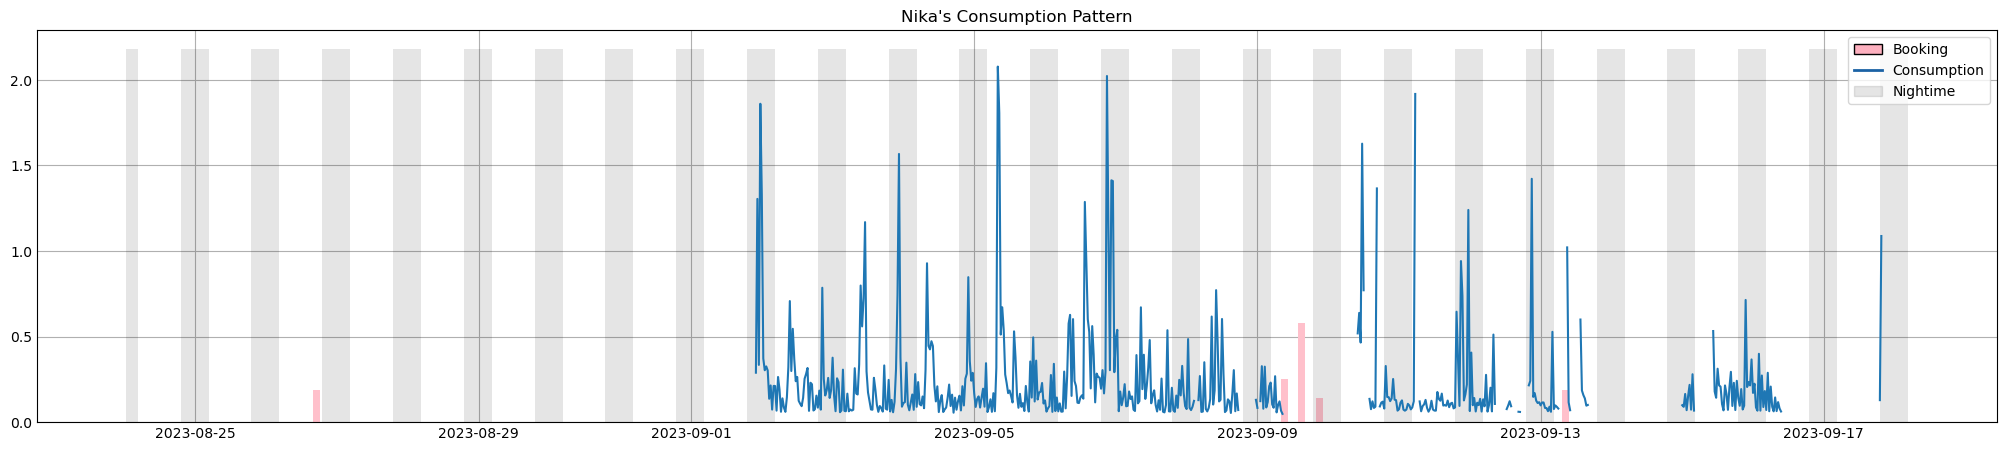

In [12]:
bookings108Nika = g1Bookings.loc[g1Bookings['user']==15]

fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings108Nika['start'],bookings108Nika['consumption'],color='pink',width=0.1)
ax.plot(consumption108Nika_coordination['time'],consumption108Nika_coordination['value'])

# Fill the background to represent nighttime
ax.fill_between(consumption108Nika_coordination['time'], ax.get_ylim()[0],
                ax.get_ylim()[1],
                where=((consumption108Nika_coordination['time'].dt.hour >= nighttime_start) |
                       (consumption108Nika_coordination['time'].dt.hour < nighttime_end)),
                facecolor="#000000", alpha=0.1)

ax.set_title("Nika's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2),
           Rectangle((0, 0), 1, 1, color="#000000", ec="k", alpha=0.1)]
labels = ["Booking", "Consumption", "Nightime"]
plt.legend(handles, labels)

plt.savefig('nika_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

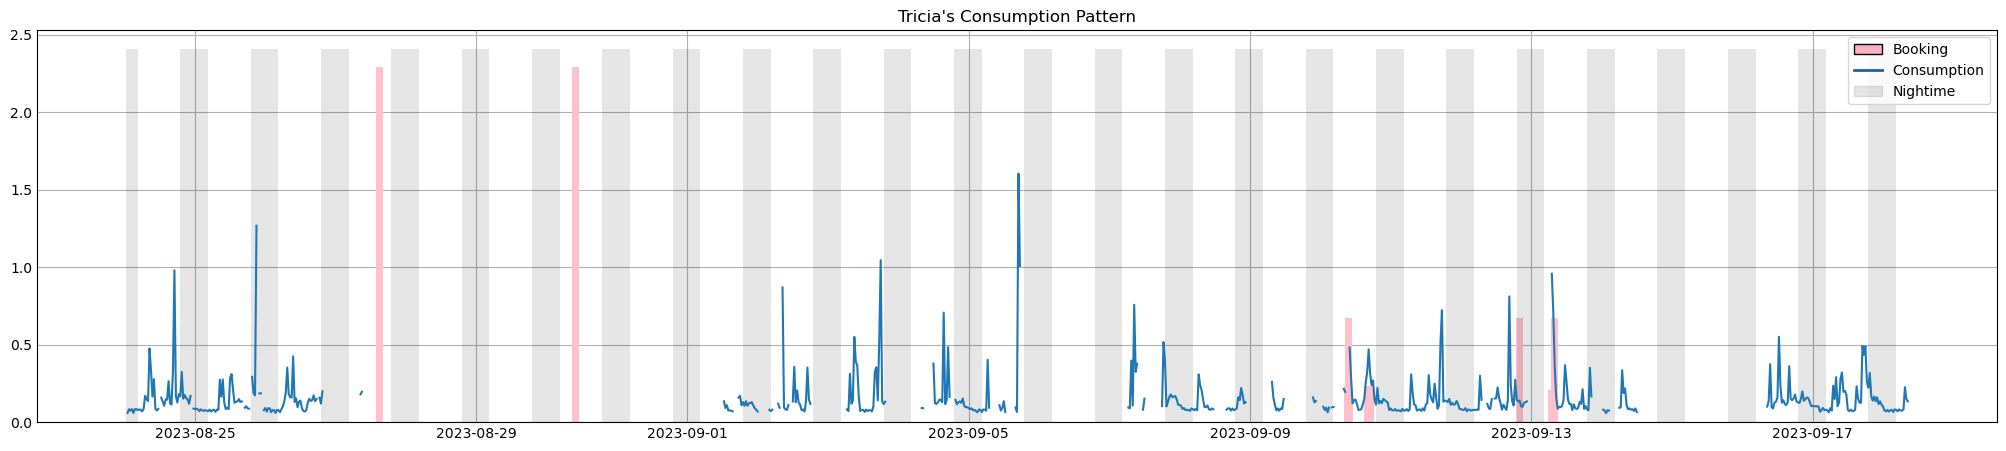

In [13]:
bookings114Tricia = g1Bookings.loc[g1Bookings['user']==17]

fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings114Tricia['start'],bookings114Tricia['consumption'],color='pink',width=0.1)
ax.plot(consumption114Tricia_coordination['time'],consumption114Tricia_coordination['value'])

# Fill the background to represent nighttime
ax.fill_between(consumption114Tricia_coordination['time'], ax.get_ylim()[0],
                ax.get_ylim()[1],
                where=((consumption114Tricia_coordination['time'].dt.hour >= nighttime_start) |
                       (consumption114Tricia_coordination['time'].dt.hour < nighttime_end)),
                facecolor="#000000", alpha=0.1)

ax.set_title("Tricia's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2),
           Rectangle((0, 0), 1, 1, color="#000000", ec="k", alpha=0.1)]
labels = ["Booking", "Consumption", "Nightime"]
plt.legend(handles, labels)

plt.savefig('tricia_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

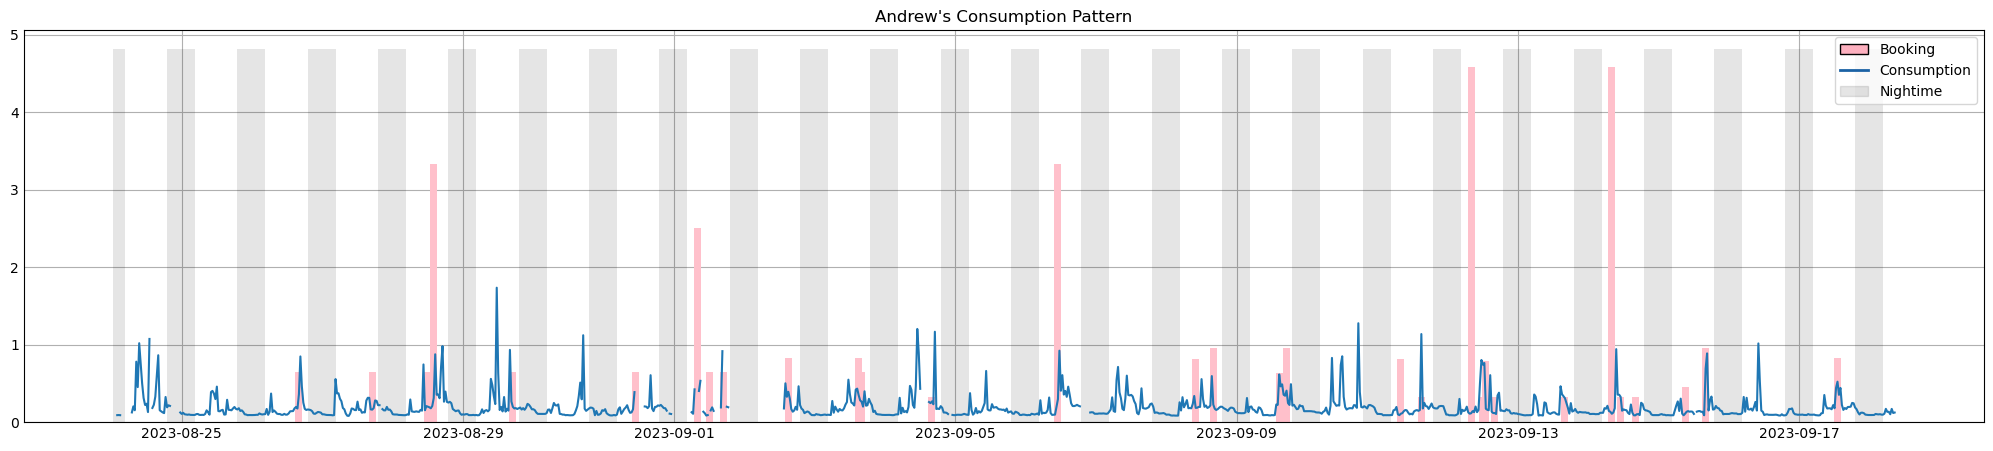

In [43]:
bookings101Andrew = g1Bookings.loc[g1Bookings['user']==19]

fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings101Andrew['start'],bookings101Andrew['consumption'],color='pink',width=0.1)
ax.plot(consumption101Andrew_coordination['time'],consumption101Andrew_coordination['value'])

# Fill the background to represent nighttime
ax.fill_between(consumption101Andrew_coordination['time'], ax.get_ylim()[0],
                ax.get_ylim()[1],
                where=((consumption101Andrew_coordination['time'].dt.hour >= nighttime_start) |
                       (consumption101Andrew_coordination['time'].dt.hour < nighttime_end)),
                facecolor="#000000", alpha=0.1)

ax.set_title("Andrew's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2),
           Rectangle((0, 0), 1, 1, color="#000000", ec="k", alpha=0.1)]
labels = ["Booking", "Consumption", "Nightime"]
plt.legend(handles, labels)

plt.savefig('andrew_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

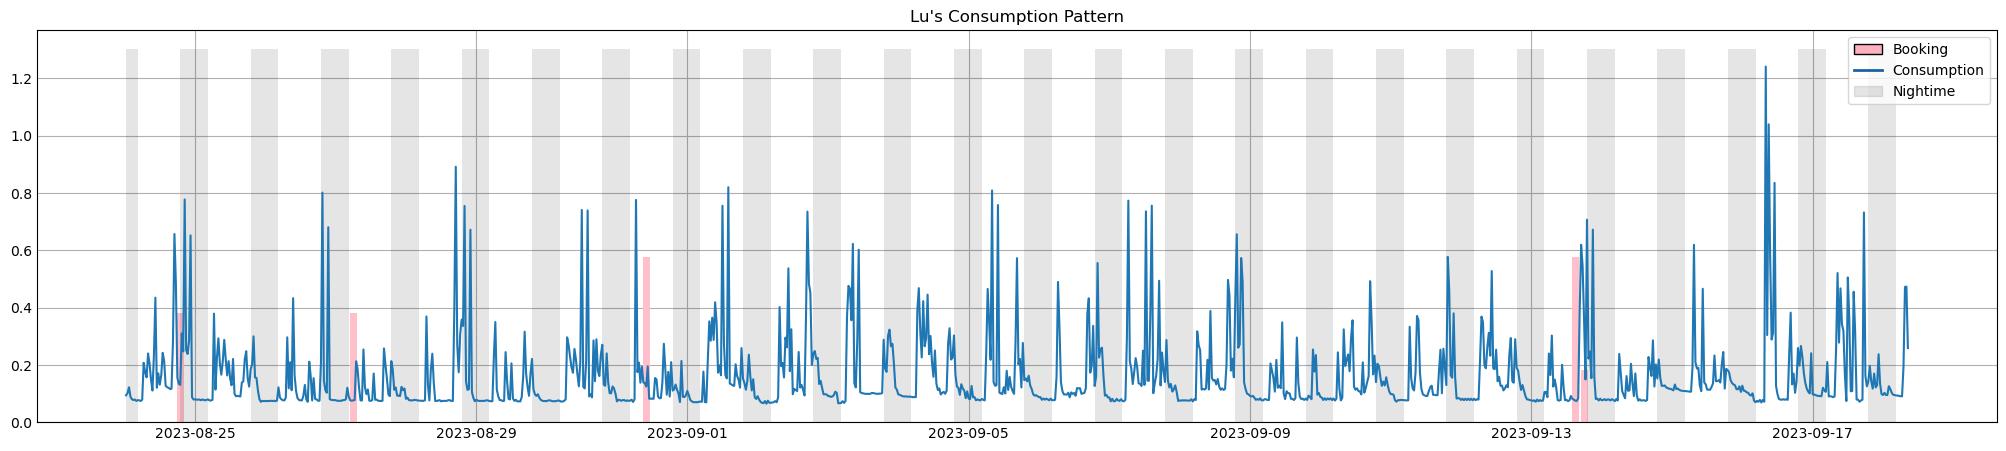

In [33]:
bookings106Lu = g1Bookings.loc[g1Bookings['user']==20]
bookings106Lu = bookings106Lu.drop(19) # dropping a booking that was erroneously made

fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings106Lu['start'],bookings106Lu['consumption'],color='pink',width=0.1)
ax.plot(consumption106Lu_coordination['time'],consumption106Lu_coordination['value'])

# Fill the background to represent nighttime
ax.fill_between(consumption106Lu_coordination['time'], ax.get_ylim()[0],
                ax.get_ylim()[1],
                where=((consumption106Lu_coordination['time'].dt.hour >= nighttime_start) |
                       (consumption106Lu_coordination['time'].dt.hour < nighttime_end)),
                facecolor="#000000", alpha=0.1)

ax.set_title("Lu's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2),
           Rectangle((0, 0), 1, 1, color="#000000", ec="k", alpha=0.1)]
labels = ["Booking", "Consumption", "Nightime"]
plt.legend(handles, labels)

plt.savefig('lu_consumption.png', dpi=300, bbox_inches='tight')
plt.show()